In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import sqlite3
import mysql.connector as cnt
import plotly.express as px


In [2]:
#prisijungimas prie mySQL, ir kursoriaus sukūrimas
DB = cnt.connect(
    host = '88.223.121.130',
    user='user',
    password='slaptazodis',
    port=3306,
    database='works'
    )
C=DB.cursor()

In [59]:
sql="""SELECT gamintojas, price, pagaminimo_data as data, rida, pavaros, variklis 
FROM autopliuslt
where rida != 'Nenurodyta'
group by id;"""
C.execute(sql)
ans = C.fetchall()
gamintojas, price, pagaminimo_data, rida, pavaros, variklis = list(map(list, zip(*ans)))

# df = pd.DataFrame(ans, columns=['gamintojas', 'price', 'data', 'rida', 'pavaros', 'variklis'])
# df.head(2)

df = pd.read_sql_query(sql, con=DB)
df.head(15)

,gamintojas,price,data,rida,pavaros,variklis
0,Mitsubishi,1 450,1996,173 810 km,Mechaninė,2500 cm³
1,Isuzu,850,2003,186 684 km,Mechaninė,3000 cm³
2,Hyundai,1 450,2004,159 326 km,Mechaninė,2400 cm³
3,Toyota,1 450,2008,249 449 km,Mechaninė,2200 cm³
4,Mercedes-Benz,1 450,2003,205 997 km,Automatinė,2700 cm³
5,Mercedes-Benz,27 400,2015,350 000 km,Automatinė,"2143 cm³, 163 AG (120kW)"
6,BMW,5 900,1971-01,9 000 km,Mechaninė,1600 cm³
7,Mini,2 650,2002-05,134 900 km,Mechaninė,"1598 cm³, 116 AG (85kW)"
8,Audi,25 000,2016-06,112 000 km,Automatinė,"3000 cm³, 333 AG (245kW)"
9,Lincoln,19 500,1969,79 000 km,Automatinė,7500 cm³


In [ ]:
# Turite nusiskaityti iš SQL DB lentelės autopliuslt į Pandas DataFrame gamintoją,
# kainą, pagaminimo datą, ridą, pavarų tipą, variklio informaciją. SQL užklausoje 
# turite atmesti tuos įrašus, kur rida nenurodyta, taip pat palikite tik nesikartojančius
# įrašus (atranka pagal ID stuleplį - jei ID sutampa - reiškia, jog skelbimas dubliuojasi)

In [83]:
def kw(a):
    b=a.split(' ')
    c=b[-1]
    if c[-3:-1] == 'kW':
        d=c.replace('(', '').replace(')', '').replace('kW', '')
        d=int(d)
        e=np.ceil(d/20)*20
    else:
        e =np.nan
    return e

df['ridaN']=df['rida'].apply(lambda x: int(x.replace(' ', '').replace('km', '')))
df['kainaN']=df['price'].apply(lambda x: int(x.replace(' ', '')))
df['amzius']=df['data'].apply(lambda s: 2024-int(s[:4]))
df['rida5000']=np.ceil(df['ridaN']/5000)*5000
df['variklisN']=df['variklis'].apply(kw)


df.head(15)

,gamintojas,price,data,rida,pavaros,variklis,ridaN,kainaN,amzius,rida5000,variklisN
0,Mitsubishi,1 450,1996,173 810 km,Mechaninė,2500 cm³,173810,1450,28,175000.0,NaN
1,Isuzu,850,2003,186 684 km,Mechaninė,3000 cm³,186684,850,21,190000.0,NaN
2,Hyundai,1 450,2004,159 326 km,Mechaninė,2400 cm³,159326,1450,20,160000.0,NaN
3,Toyota,1 450,2008,249 449 km,Mechaninė,2200 cm³,249449,1450,16,250000.0,NaN
4,Mercedes-Benz,1 450,2003,205 997 km,Automatinė,2700 cm³,205997,1450,21,210000.0,NaN
5,Mercedes-Benz,27 400,2015,350 000 km,Automatinė,"2143 cm³, 163 AG (120kW)",350000,27400,9,350000.0,120.0
6,BMW,5 900,1971-01,9 000 km,Mechaninė,1600 cm³,9000,5900,53,10000.0,NaN
7,Mini,2 650,2002-05,134 900 km,Mechaninė,"1598 cm³, 116 AG (85kW)",134900,2650,22,135000.0,100.0
8,Audi,25 000,2016-06,112 000 km,Automatinė,"3000 cm³, 333 AG (245kW)",112000,25000,8,115000.0,260.0
9,Lincoln,19 500,1969,79 000 km,Automatinė,7500 cm³,79000,19500,55,80000.0,NaN


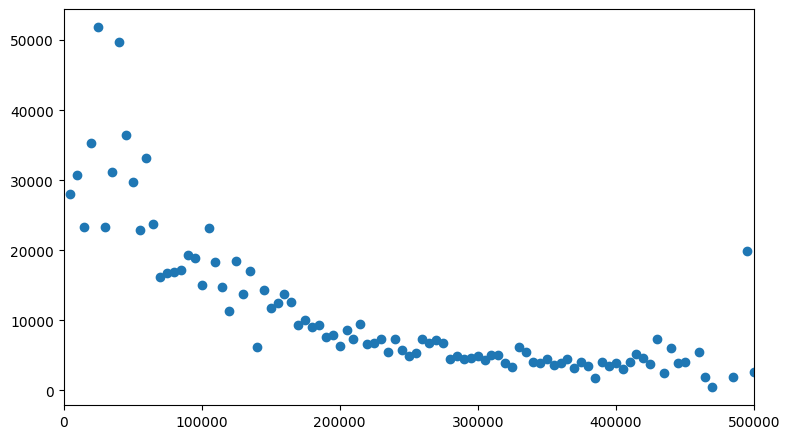

In [47]:
dfg = df[['rida5000', 'kainaN']].groupby('rida5000').mean(numeric_only=True).reset_index()
dfg.head()

fig, axis = plt.subplots(figsize=(8,4.5))
#plotting code:
axis.scatter(dfg['rida5000'], dfg['kainaN'])
axis.set_xlim(0, 5e5)
#axis.legend(loc='best')
#axis.ticklabel_format(style='plain')
fig.tight_layout()
plt.show()

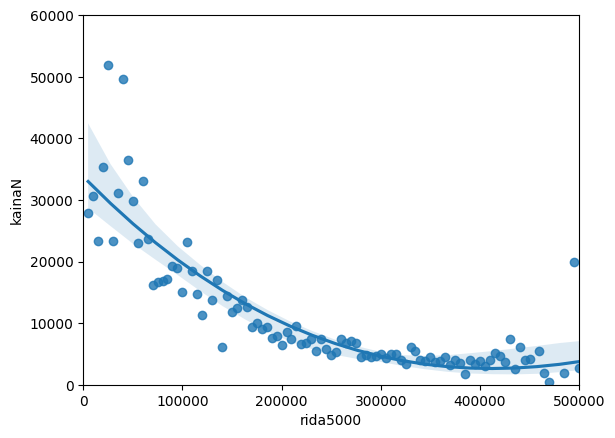

In [53]:
#seaborn regplot()

axis=sns.regplot(data=dfg, x='rida5000', y='kainaN', order=3)
axis.set_xlim(0, 5e5)
axis.set_ylim(0, 6e4)
plt.show()

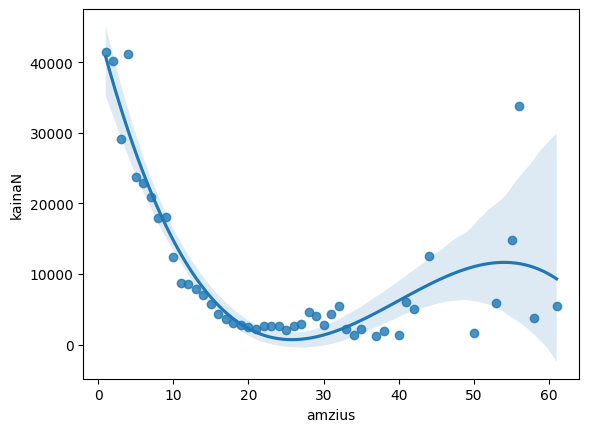

In [57]:
dfg = df[['amzius', 'kainaN']].groupby('amzius').mean(numeric_only=True).reset_index()
dfg.head()

axis=sns.regplot(data=dfg, x='amzius', y='kainaN', order=3)
# axis.set_xlim(0, 5e5)
# axis.set_ylim(0, 6e4)
plt.show()

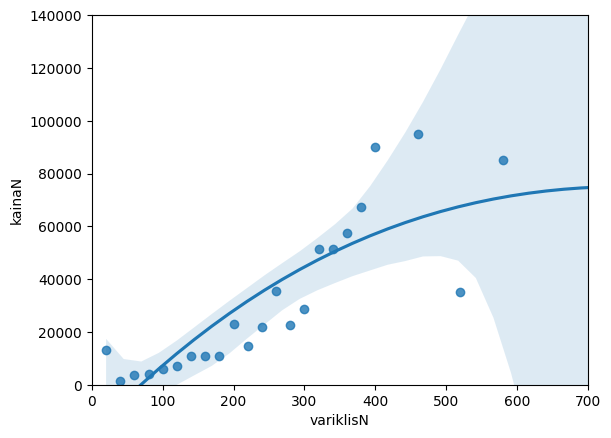

In [95]:
dfg = df[['variklisN', 'kainaN']].groupby('variklisN').mean(numeric_only=True).reset_index()


axis=sns.regplot(data=dfg, x='variklisN', y='kainaN', order=3)
axis.set_xlim(0, 700)
axis.set_ylim(0, 140000)
plt.show()

In [111]:
dfA=df[df['pavaros']=='Automatinė']
dfM=df[df['pavaros']=='Mechaninė']
dfgA = dfA[['amzius', 'kainaN']].groupby('amzius').mean(numeric_only=True).reset_index()
dfgM = dfM[['amzius', 'kainaN']].groupby('amzius').mean(numeric_only=True).reset_index()
dfgM.head()

,amzius,kainaN
0,1,20700.000000
1,2,27100.000000
2,3,20149.166667
3,4,21320.000000
4,5,15356.125000


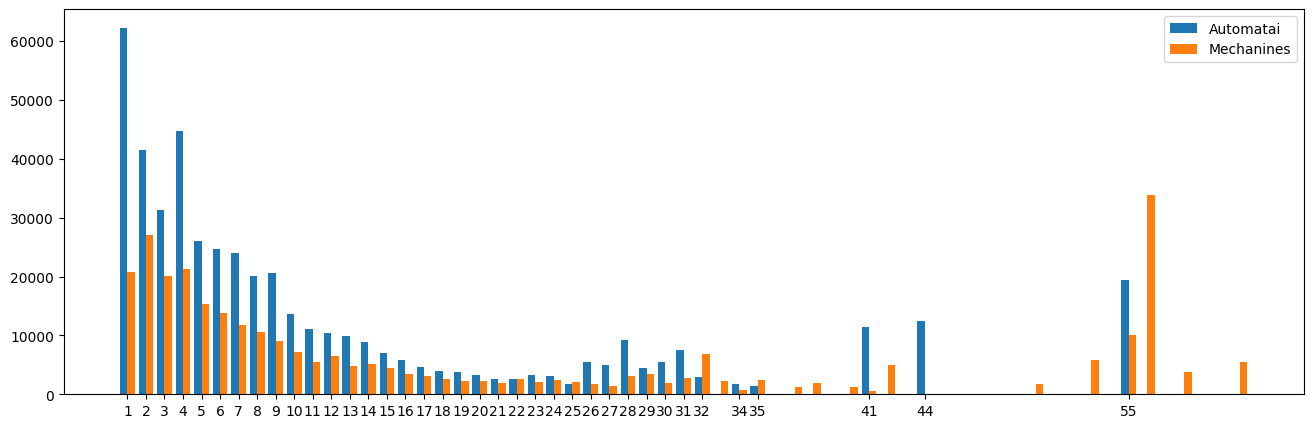

In [117]:
fig, axis = plt.subplots(figsize=[16, 5])
x = dfgA['amzius']
x2=dfgM['amzius']
w = 0.4
i = axis.bar(x-w/2,dfgA['kainaN'], label='Automatai', width=w)
o = axis.bar(x2+w/2, dfgM['kainaN'], label='Mechanines', width=w)

axis.set_xticks(x)
axis.set_xticklabels(dfgA['amzius'])
# axis.bar_label(i)
# axis.bar_label(o)
axis.legend(loc='best')
plt.show()